# **1. Data visualization**

1.1 Histogram for User Ratings

     User  Category 1  Category 2  Category 3  Category 4  Category 5  \
0  User 1         0.0         0.0        3.63        3.65         5.0   
1  User 2         0.0         0.0        3.63        3.65         5.0   
2  User 3         0.0         0.0        3.63        3.63         5.0   
3  User 4         0.0         0.5        3.63        3.63         5.0   
4  User 5         0.0         0.0        3.63        3.63         5.0   

   Category 6  Category 7  Category 8  Category 9  ...  Category 16  \
0        2.92         5.0        2.35        2.33  ...         0.59   
1        2.92         5.0        2.64        2.33  ...         0.59   
2        2.92         5.0        2.64        2.33  ...         0.59   
3        2.92         5.0        2.35        2.33  ...         0.59   
4        2.92         5.0        2.64        2.33  ...         0.59   

  Category 17  Category 18  Category 19  Category 20  Category 21  \
0         0.5          0.0          0.5          0.0          0.0

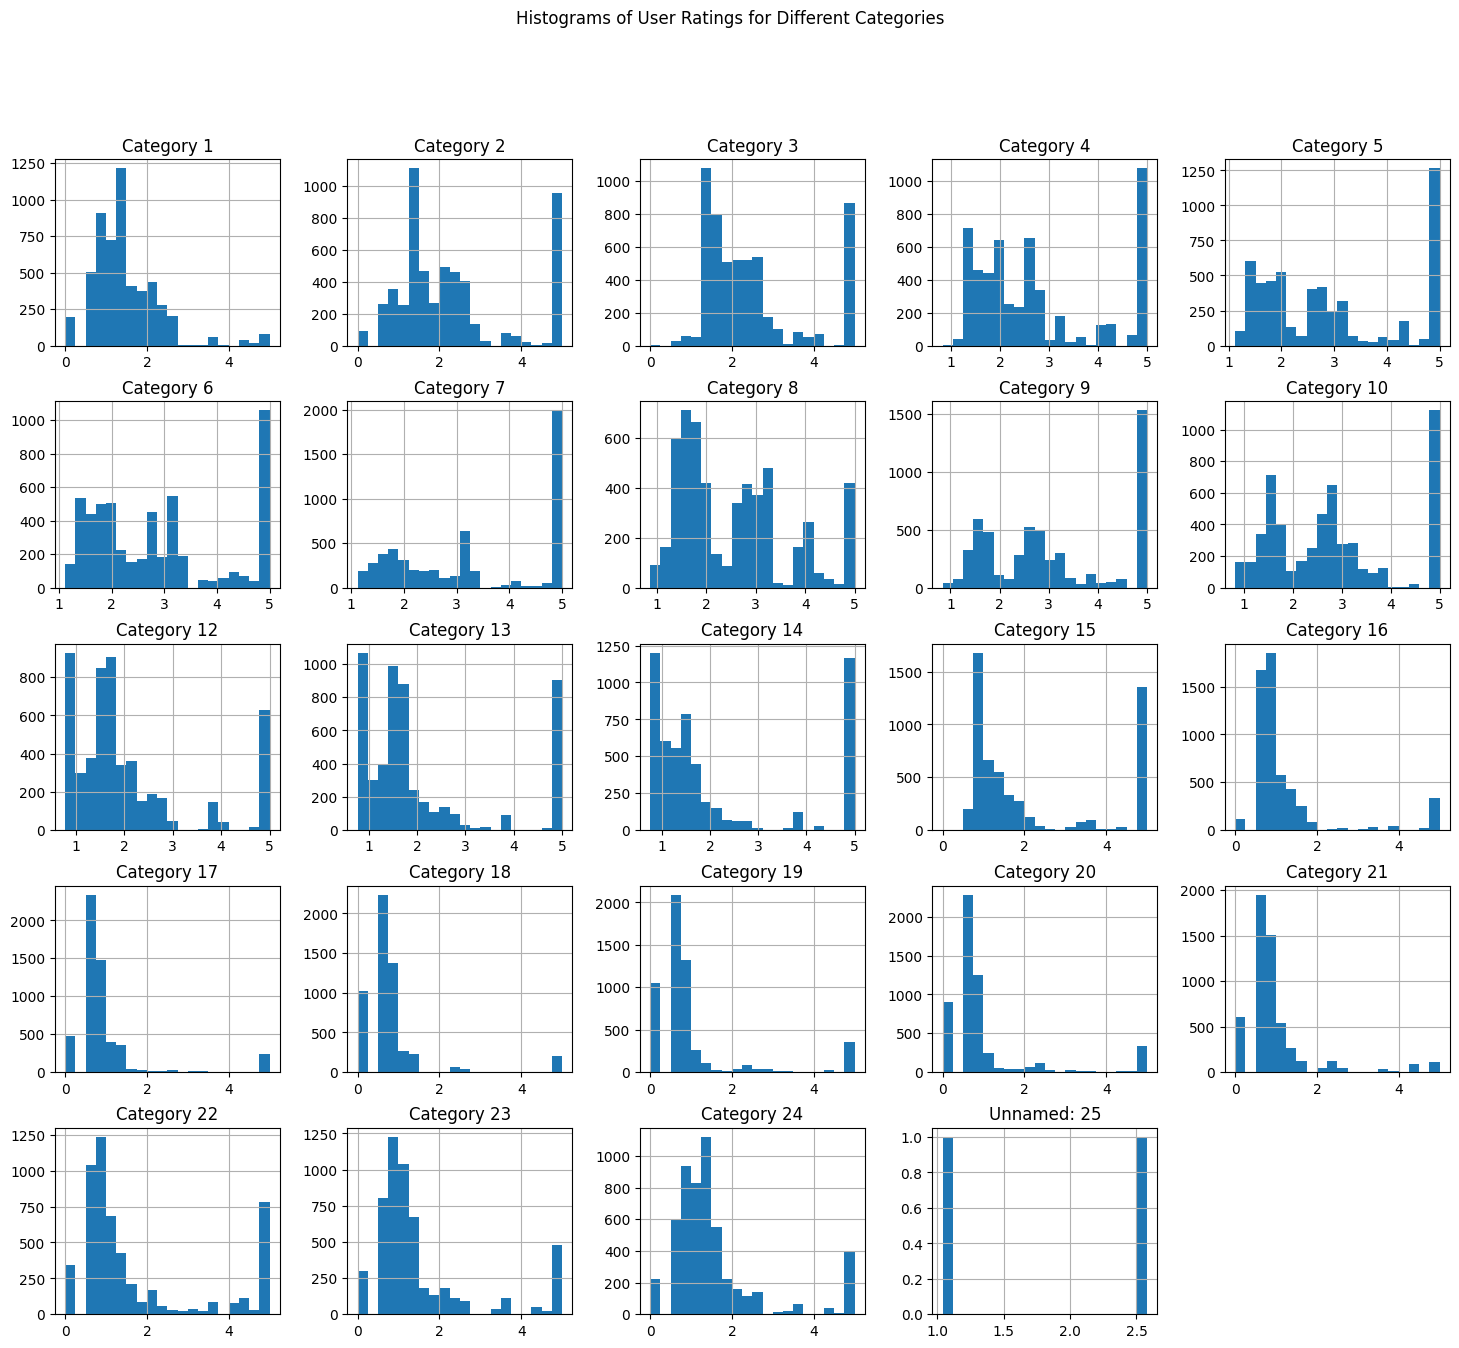

In [24]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# URL of the dataset from UCI repository
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00485/google_review_ratings.csv'

# Load the dataset
data = pd.read_csv(url)

# Display the first few rows of the dataset
print(data.head())

# Data Visualization: Histograms for all features
data.hist(bins=20, figsize=(18, 15))
plt.suptitle('Histograms of User Ratings for Different Categories')
plt.show()


1.2 Pairwise Scatter Plots

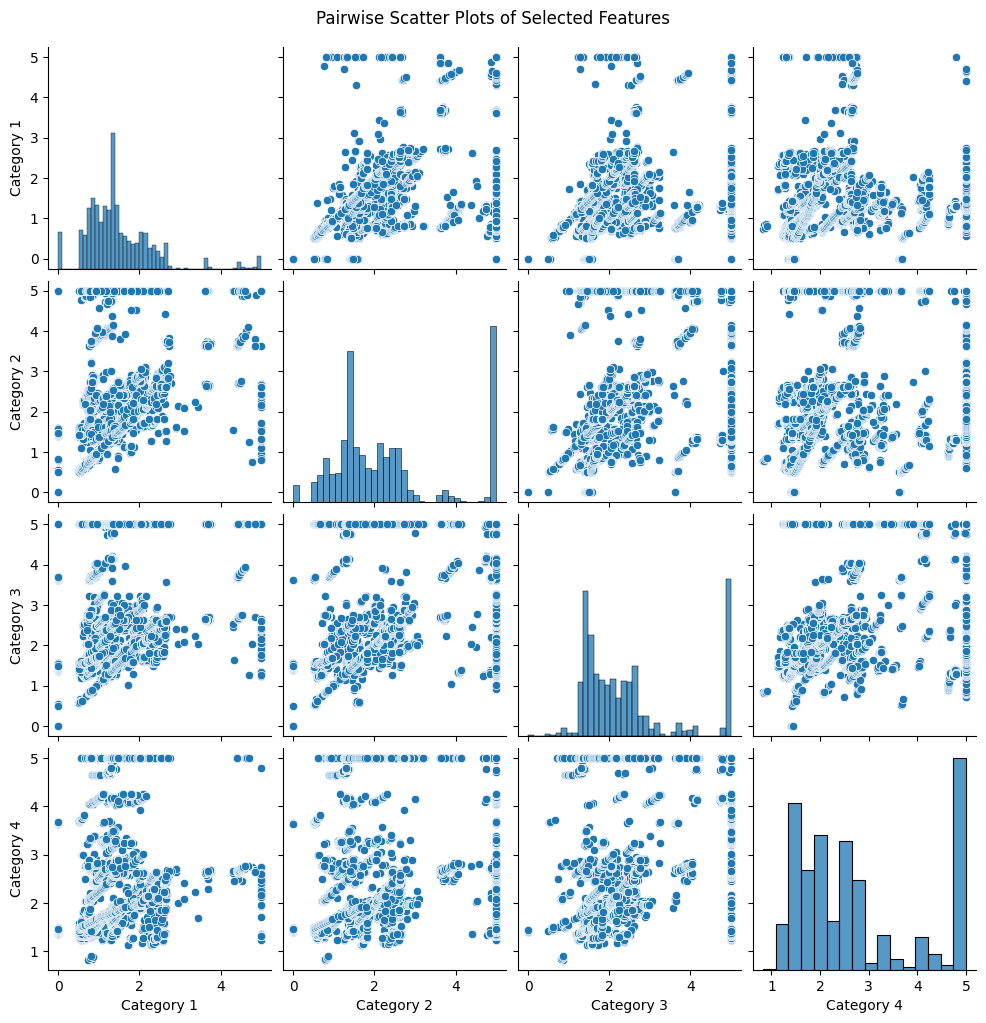

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the first few category columns
selected_features = data.columns[:5]

# Pairwise Scatter Plots for selected features
sns.pairplot(data[selected_features])
plt.suptitle('Pairwise Scatter Plots of Selected Features', y=1.02)
plt.show()


In [7]:
print(data.dtypes)

User            object
Category 1     float64
Category 2     float64
Category 3     float64
Category 4     float64
Category 5     float64
Category 6     float64
Category 7     float64
Category 8     float64
Category 9     float64
Category 10    float64
Category 11     object
Category 12    float64
Category 13    float64
Category 14    float64
Category 15    float64
Category 16    float64
Category 17    float64
Category 18    float64
Category 19    float64
Category 20    float64
Category 21    float64
Category 22    float64
Category 23    float64
Category 24    float64
Unnamed: 25    float64
dtype: object


# **2. Distribution analysis**

2.1 Summary Statistics

In [11]:
# Summary Statistics for each feature
summary_stats = data.describe()
print("Summary Statistics of the Data:\n", summary_stats)


Summary Statistics of the Data:
         Category 1   Category 2   Category 3   Category 4   Category 5  \
count  5456.000000  5456.000000  5456.000000  5456.000000  5456.000000   
mean      1.455720     2.319707     2.489331     2.796886     2.958941   
std       0.827604     1.421438     1.247815     1.309159     1.339056   
min       0.000000     0.000000     0.000000     0.830000     1.120000   
25%       0.920000     1.360000     1.540000     1.730000     1.770000   
50%       1.340000     1.905000     2.060000     2.460000     2.670000   
75%       1.810000     2.682500     2.740000     4.092500     4.312500   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

       Category 6   Category 7   Category 8   Category 9  Category 10  ...  \
count  5456.00000  5456.000000  5456.000000  5456.000000  5456.000000  ...   
mean      2.89349     3.351395     2.540795     3.126019     2.832729  ...   
std       1.28240     1.413492     1.111391     1.356802     1.307

2.2 Density plots for each feature

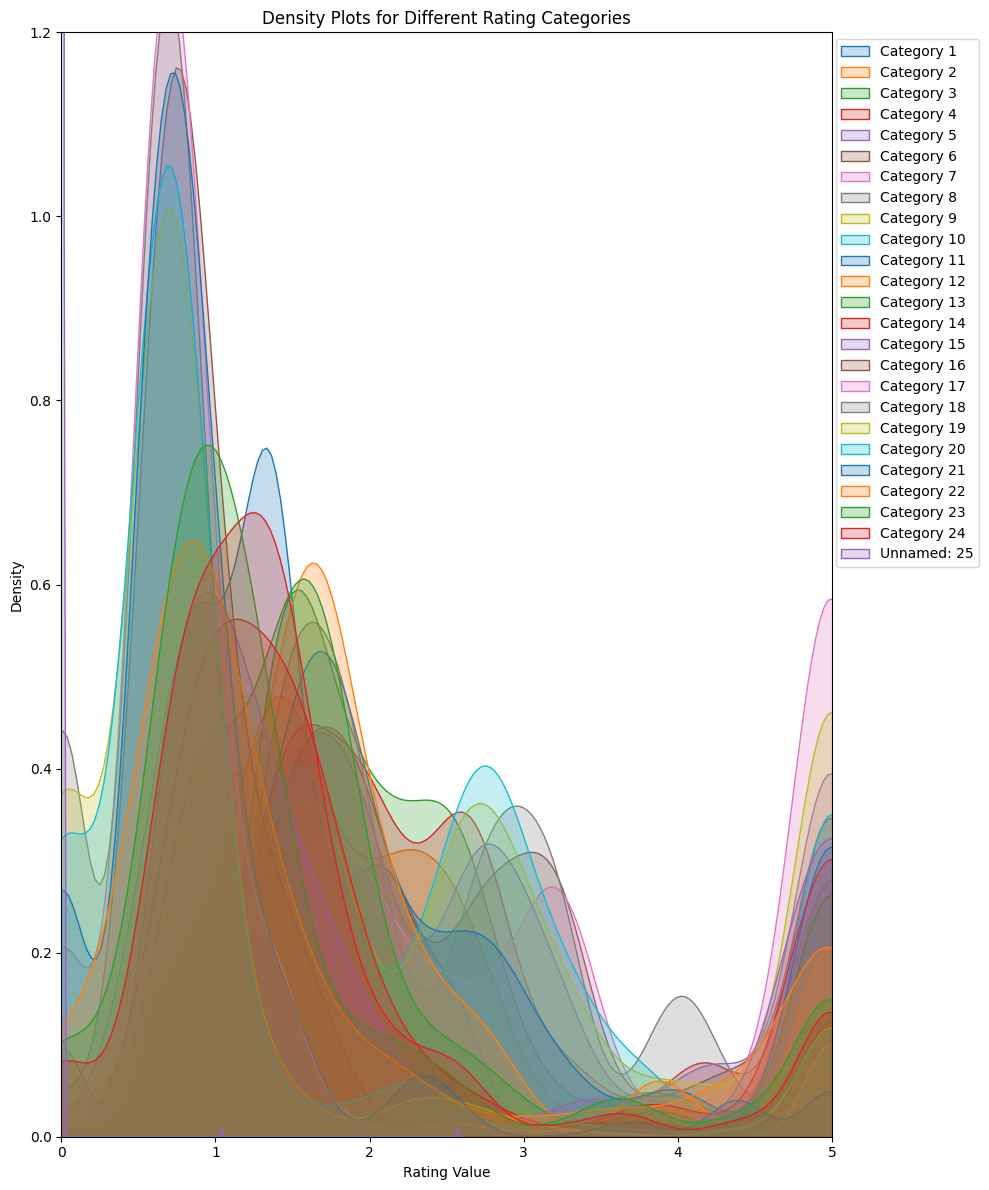

In [38]:


# For ensuring that all columns are numeric, converting any non-numeric values to NaN and then filling with zero if necessary
data = data.apply(pd.to_numeric, errors='coerce').fillna(0)

# Determine a common range for the x-axis based on the minimum and maximum rating values.
x_min, x_max = data.min().min(), data.max().max()

# Updated density plots with `fill=True` and adjusted scales
plt.figure(figsize=(10, 12))

for column in data.columns[1:]:
    sns.kdeplot(data[column], fill=True, label=column)

# Adjust x-axis and y-axis limits for better visualization
plt.xlim(x_min, x_max)
plt.ylim(0, 1.2)
plt.title('Density Plots for Different Rating Categories')
plt.xlabel('Rating Value')
plt.ylabel('Density')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()




2.3 Box Plot for Outlier Detection

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

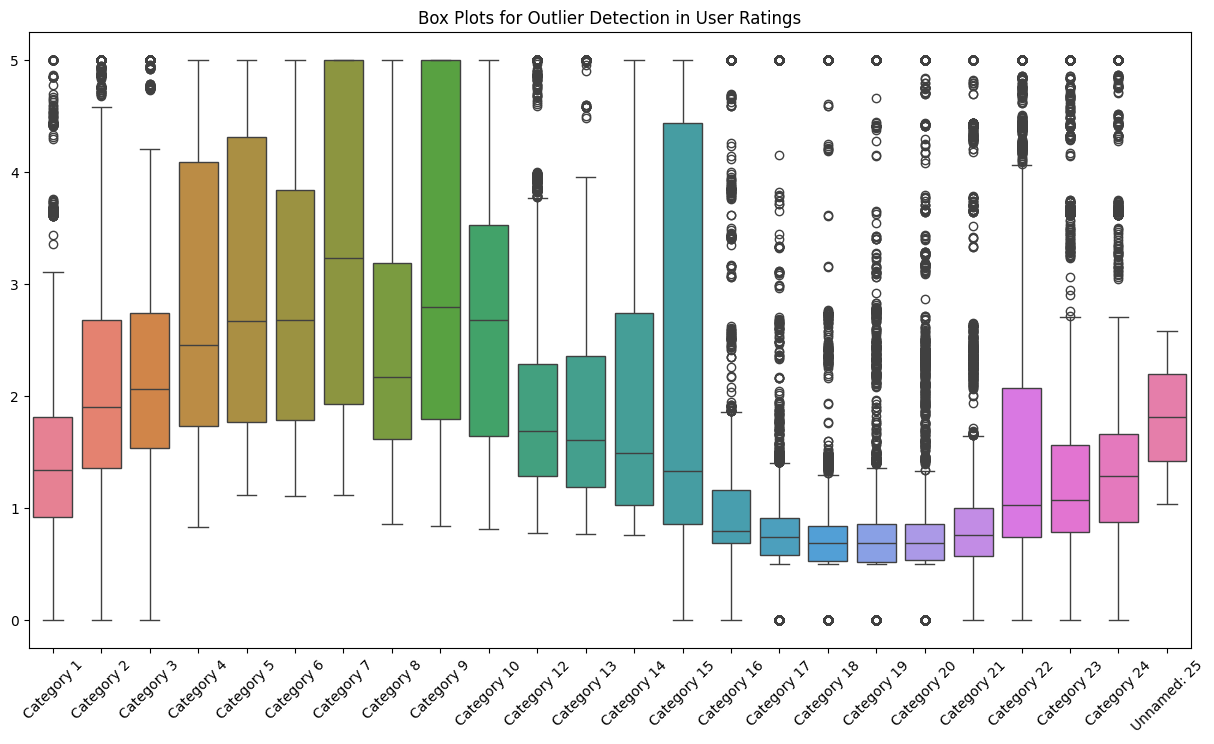

In [12]:
# Box Plots for Outlier Detection across different features
plt.figure(figsize=(15, 8))
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.title('Box Plots for Outlier Detection in User Ratings')
plt.show()


2.4 Normality Test (Shapiro-Wilk Test)

In [15]:
from scipy.stats import shapiro

# Normality Check for a specific feature (e.g., 'Churches')
stat, p_value = shapiro(data['Category 1'])
print(f'Shapiro-Wilk Test for Normality - Churches: p-value = {p_value}')

# Interpretation of the p-value
if p_value > 0.05:
    print('The feature "Churches" is normally distributed.')
else:
    print('The feature "Churches" is not normally distributed.')


Shapiro-Wilk Test for Normality - Churches: p-value = 3.191808489669917e-55
The feature "Churches" is not normally distributed.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5456.
  res = hypotest_fun_out(*samples, **kwds)


# **3. Correlation analysis**

3.1 Calculation of Correlation Coefficient

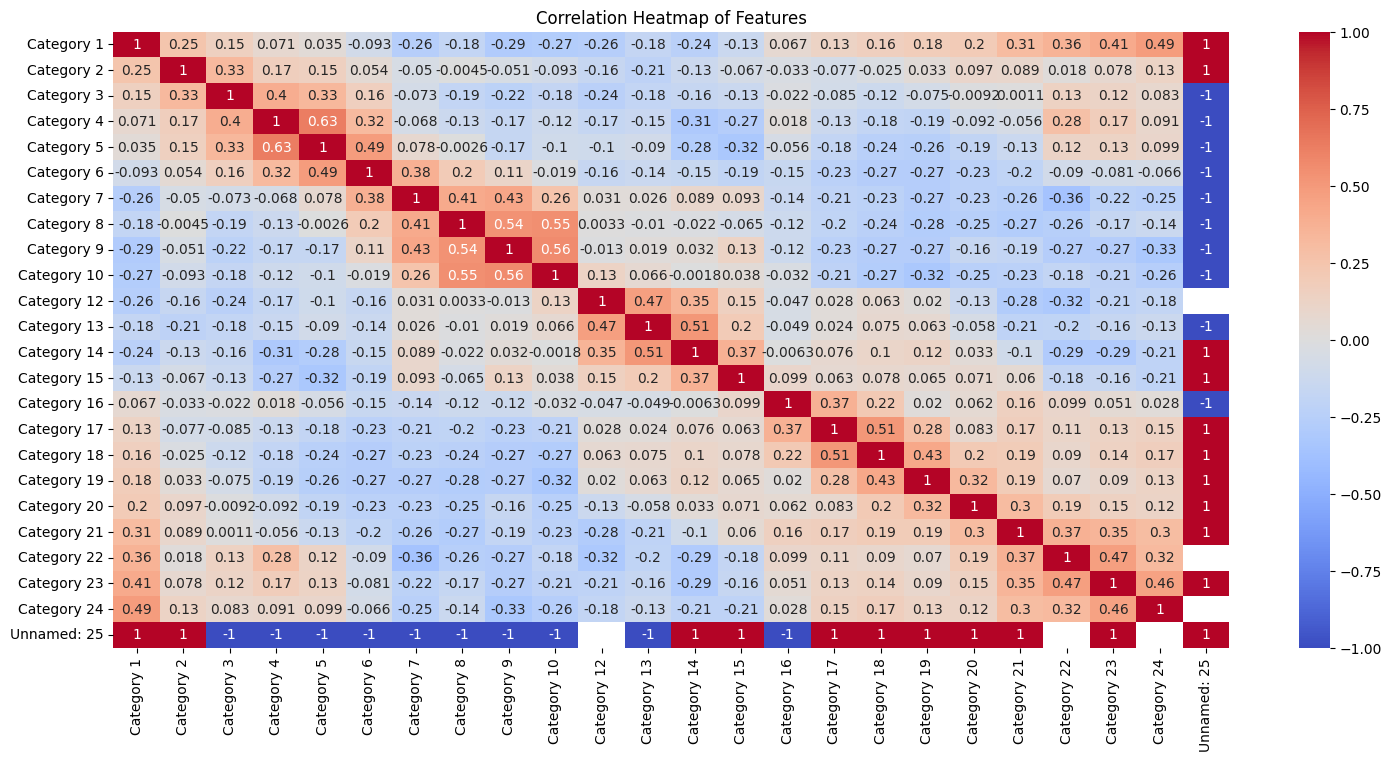

In [17]:

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Check if numeric_data is empty
if numeric_data.empty:
    print("No numeric columns found for correlation.")
else:
    # Calculate correlation matrix
    correlation_matrix = numeric_data.corr()

    # Create Correlation Heatmap
    plt.figure(figsize=(18, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap of Features')
    plt.show()

3.2 Strong Correlation Analysis

In [44]:
# Identify strong correlation with different thresholds
thresholds = [0.1, 0.2, 0.4, 0.7]
for threshold in thresholds:
    strong_correlations = correlation_matrix[(correlation_matrix > threshold) | (correlation_matrix < -threshold)]
    strong_correlations_cleaned = strong_correlations.dropna(how='all').dropna(axis=1, how='all')
    print(f"Strong Correlations for threshold {threshold}:\n", strong_correlations_cleaned)



Strong Correlations for threshold 0.1:
              Category 1  Category 2  Category 3  Category 4  Category 5  \
Category 1     1.000000    0.248991    0.148805         NaN         NaN   
Category 2     0.248991    1.000000    0.325011    0.167338    0.153520   
Category 3     0.148805    0.325011    1.000000    0.396786    0.329925   
Category 4          NaN    0.167338    0.396786    1.000000    0.626868   
Category 5          NaN    0.153520    0.329925    0.626868    1.000000   
Category 6          NaN         NaN    0.161242    0.315354    0.489937   
Category 7    -0.264632         NaN         NaN         NaN         NaN   
Category 8    -0.181267         NaN   -0.186308   -0.128064         NaN   
Category 9    -0.290214         NaN   -0.219842   -0.169442   -0.170430   
Category 10   -0.274683         NaN   -0.179090   -0.115515   -0.100191   
Category 12   -0.261190   -0.157070   -0.235708   -0.166140   -0.104966   
Category 13   -0.178666   -0.213747   -0.182322   -0.145093 